In [1]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [3]:
training_size = 20000
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Hyperparameters
vocab_size = 10000
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generatve and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

print('training_padded',training_padded.shape)
print('testing_padded',testing_padded.shape)
print('training_labels',training_labels.shape)
print('testing_labels',testing_labels.shape)

training_padded (20000, 120)
testing_padded (6709, 120)
training_labels (20000,)
testing_labels (6709,)


In [12]:
import tensorflow as tf

# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [13]:
NUM_EPOCHS = 10

# Train the model
history_lstm = model_lstm.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10


2024-01-29 21:19:10.767042: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204


 10/625 [..............................] - ETA: 3s - loss: 0.6934 - accuracy: 0.4844   

2024-01-29 21:19:11.543745: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


625/625 [==============================] - 8s 9ms/step - loss: 0.4150 - accuracy: 0.7958 - val_loss: 0.3318 - val_accuracy: 0.8554
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 0.2235 - accuracy: 0.9107 - val_loss: 0.3508 - val_accuracy: 0.8547
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.1489 - accuracy: 0.9426 - val_loss: 0.4278 - val_accuracy: 0.8483
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0946 - accuracy: 0.9662 - val_loss: 0.4763 - val_accuracy: 0.8456
Epoch 5/10
625/625 [==============================] - 7s 10ms/step - loss: 0.0588 - accuracy: 0.9809 - val_loss: 0.5304 - val_accuracy: 0.8438
Epoch 6/10
625/625 [==============================] - 8s 12ms/step - loss: 0.0370 - accuracy: 0.9890 - val_loss: 0.6403 - val_accuracy: 0.8396
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.7578 - val_accuracy: 0.8366
Epoch 8/10
6

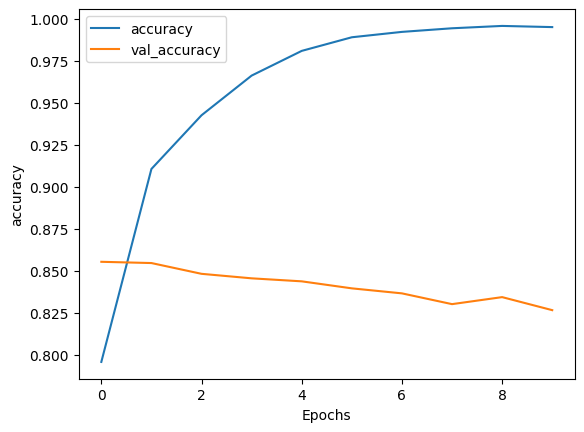

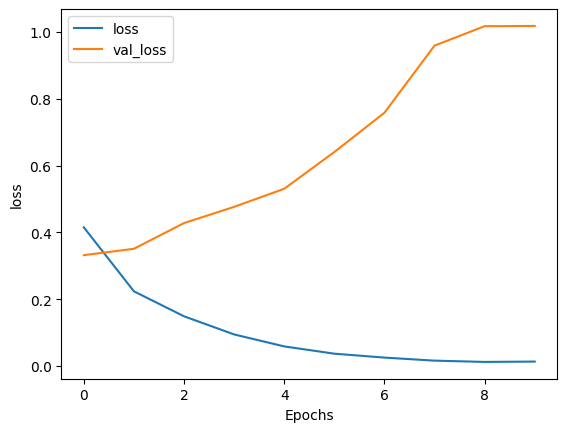

In [14]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')